## Preprocessing

In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

#  Import and read the charity_data.csv.
import pandas as pd 
#application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
# no url because no internet
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(6)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

In [21]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [22]:
# Look at APPLICATION_TYPE value counts for binning
application_bins = application_df['APPLICATION_TYPE'].value_counts()
application_bins

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_bins[application_bins < 700].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [24]:
# Look at CLASSIFICATION value counts for binning
classification_bins = application_df['CLASSIFICATION'].value_counts()
classification_bins.head(10)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: count, dtype: int64

In [25]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_bins[classification_bins>1].head(10)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: count, dtype: int64

In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_bins[classification_bins<100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df.head(6)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Split our preprocessed data into our features and target arrays
y_val = application_df['IS_SUCCESSFUL'].values
X_vals = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
# train/test base is 75/25
X_train, X_test, y_train, y_test = train_test_split(X_vals, 
                                                    y_val, 
                                                    random_state=1) # review stratify when testing

In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [30]:
# define input features and number of hidden nodes on each layer
input_features = len(X_train_scaled[0])

# layer counts from summary-output shape, it's like a sieve 
hidden1 = 80
hidden2 = 30
hidden3 = 1

# run this block when you want to reset
nn = tf.keras.models.Sequential()

In [31]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden1, input_dim=input_features, input_shape=(48,), activation='relu'))

# Second hidden layer, input features for first layer only
nn.add(tf.keras.layers.Dense(units=hidden2, activation='relu'))

# Output layer - sigmoid as our y result is binary .. 'probability activation function'
nn.add(tf.keras.layers.Dense(units=hidden3, activation='sigmoid'))

# Check the structure of the model
nn.summary()
# restarting the kernel so you don't know how much I struggled with this

Model: "sequential_1"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3920      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6381 (24.93 KB)
Trainable params: 6381 (24.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [33]:
# Train the model, storing epoch results as history to use in visualization
history = nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.25)

Epoch 1/100
603/603 [==============================] - 1s 1ms/step - loss: 0.5734 - accuracy: 0.7182 - val_loss: 0.5482 - val_accuracy: 0.7346
Epoch 2/100
603/603 [==============================] - 1s 872us/step - loss: 0.5569 - accuracy: 0.7262 - val_loss: 0.5405 - val_accuracy: 0.7397
Epoch 3/100
603/603 [==============================] - 1s 861us/step - loss: 0.5542 - accuracy: 0.7280 - val_loss: 0.5453 - val_accuracy: 0.7383
Epoch 4/100
603/603 [==============================] - 1s 846us/step - loss: 0.5507 - accuracy: 0.7294 - val_loss: 0.5504 - val_accuracy: 0.7371
Epoch 5/100
603/603 [==============================] - 1s 881us/step - loss: 0.5503 - accuracy: 0.7280 - val_loss: 0.5397 - val_accuracy: 0.7403
Epoch 6/100
603/603 [==============================] - 1s 880us/step - loss: 0.5490 - accuracy: 0.7298 - val_loss: 0.5411 - val_accuracy: 0.7389
Epoch 7/100
603/603 [==============================] - 1s 869us/step - loss: 0.5486 - accuracy: 0.7304 - val_loss: 0.5414 - val_accu

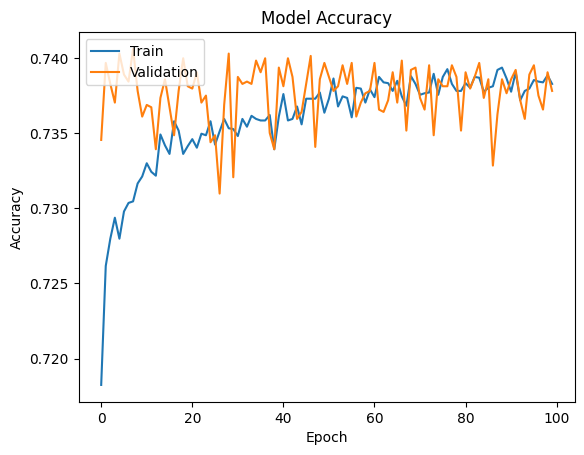

In [34]:
import matplotlib.pyplot as plt
# visualization of epoch instance
# accuracy is the training accuracy, showing how well the model performs on the training data during each epoch of training
# val_accuracy refers to the model performance on the separate validation data set during each epoch, indicator when validation_split is used
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5586 - accuracy: 0.7273 - 163ms/epoch - 607us/step
Loss: 0.5585877299308777, Accuracy: 0.7273469567298889


In [36]:
# Export our model to HDF5 file
import h5py
nn.save_weights('AlphabetSoupVentures.h5')